Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.
Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:

Create the XOR gate's truth table dataset.

In [3]:
import numpy as np

# Define the input features (X) and corresponding labels (y)
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

print("Input features (X):")
print(x)
print("\nCorresponding labels (y):")
print(y)

Input features (X):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Corresponding labels (y):
[0 1 1 0]


Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.

In [8]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        sum_inputs = np.dot(inputs, self.weights) + self.bias
        return self.activate(sum_inputs)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error



# Initialize and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(x, y)

# Test the perceptron
print("Predictions after training:")
for inputs in X:
    prediction = perceptron.predict(inputs)
    print(f"Input: {inputs}, Prediction: {prediction}")

# Calculate accuracy
accuracy = sum(perceptron.predict(inputs) == label for inputs, label in zip(X, y)) / len(y)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Predictions after training:
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0

Accuracy: 50.00%


In [16]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=200):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        sum_inputs = np.dot(inputs, self.weights) + self.bias
        return self.activate(sum_inputs)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

# Create the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

# Test the perceptron
print("Predictions after training:")
for inputs in X:
    prediction = perceptron.predict(inputs)
    print(f"Input: {inputs}, Prediction: {prediction}")

# Calculate accuracy
accuracy = sum(perceptron.predict(inputs) == label for inputs, label in zip(X, y)) / len(y)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Predictions after training:
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0

Accuracy: 25.00%


Observe and discuss the perceptron's performance in this scenario.:

Perceptron was 50-50 correct , therefore the performance of perceptron was very poor.
Therefoe Xor is not linearly separable.

After increasing the number of epochs the Accuracy was decreased to 25%.


Implement XOR using Multi-Layer Perceptron.

In [11]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_ih = np.random.randn(self.input_size, self.hidden_size)
        self.bias_h = np.zeros((1, self.hidden_size))
        self.weights_ho = np.random.randn(self.hidden_size, self.output_size)
        self.bias_o = np.zeros((1, self.output_size))

    def forward(self, X):
        # Hidden layer
        self.hidden = sigmoid(np.dot(X, self.weights_ih) + self.bias_h)
        # Output layer
        self.output = sigmoid(np.dot(self.hidden, self.weights_ho) + self.bias_o)
        return self.output

    def backward(self, X, y, output):
        # Output layer error
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        # Update weights and biases
        self.weights_ho += np.dot(self.hidden.T, output_delta)
        self.bias_o += np.sum(output_delta, axis=0, keepdims=True)
        self.weights_ih += np.dot(X.T, hidden_delta)
        self.bias_h += np.sum(hidden_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Create the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the MLP
mlp = MLP(input_size=2, hidden_size=2, output_size=1)
mlp.train(x, y, epochs=10000)

# Test the MLP
print("Predictions after training:")
for inputs in X:
    prediction = mlp.predict(inputs.reshape(1, -1))
    print(f"Input: {inputs}, Prediction: {prediction[0][0]}")

# Calculate accuracy
accuracy = np.mean(mlp.predict(X) == y)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Predictions after training:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 0

Accuracy: 100.00%


Question 2:

A. Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process. (link Provided at the top of the page to download the dataset)
Task:

Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).

Preprocessing of Dataset

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('Tweets.csv')  # Adjust the filename as needed

# Select relevant columns
X = df['text']  # This is the column containing the tweet text
y = df['negativereason'].notna().astype(int)  # 1 if there's a negative reason, 0 otherwise

# Convert text to numerical features using Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Limit to top 1000 words
X = vectorizer.fit_transform(X).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to numpy arrays and reshape y
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (11712, 1000)
Testing data shape: (2928, 1000)


In [25]:
import numpy as np

class SentimentNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size=1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) / np.sqrt(self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -709, 709)))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]

        # Output layer
        dz2 = output - y
        dW2 = (1 / m) * np.dot(self.a1.T, dz2)
        db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

        # Hidden layer
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = (1 / m) * np.dot(X.T, dz1)
        db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def train(self, X, y, learning_rate, epochs):
        for _ in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, y, output)

            # Update weights and biases
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Example usage (you'll replace this with your actual preprocessed data)
if __name__ == "__main__":
    # Sample data
     # Replace these with your preprocessed data
    X_train = X_train  # Your preprocessed features (e.g., from CountVectorizer)
    y_train = y_train  # Your preprocessed labels (0 for negative, 1 for positive)

    # Create and train the model
    input_size = X_train.shape[1]  # Number of features
    hidden_size = 64  # You can adjust this
    model = SentimentNeuralNetwork(input_size=input_size, hidden_size=hidden_size)
    model.train(X_train, y_train, learning_rate=0.01, epochs=1000)

    # Test the model
    X_test = X_test  # Your preprocessed test features
    y_test = y_test  # Your preprocessed test labels

    predictions = model.predict(X_test)

Use backpropagation to optimize the model's weights based on error calculation.

Epoch 0, Loss: 0.61337535180763
Epoch 100, Loss: 0.17245063781463568
Epoch 200, Loss: 0.07366091499833563


<ipython-input-26-3616a110afa3>:34: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
<ipython-input-26-3616a110afa3>:34: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan
Accuracy: 0.8121584699453552
              precision    recall  f1-score   support

    Negative       0.73      0.75      0.74      1039
    Positive       0.86      0.85      0.85      1889

    accuracy                           0.81      2928
   macro avg       0.79      0.80      0.80      2928
weighted avg       0.81      0.81      0.81      2928



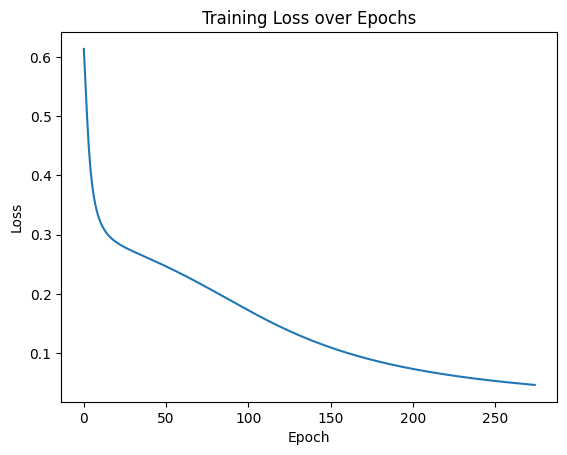

In [26]:
import numpy as np

class SentimentNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size=1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) / np.sqrt(self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -709, 709)))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return log_likelihood / m

    def backward(self, X, y, output):
        m = X.shape[0]

        # Output layer
        dz2 = output - y
        dW2 = (1 / m) * np.dot(self.a1.T, dz2)
        db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

        # Hidden layer
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = (1 / m) * np.dot(X.T, dz1)
        db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def train(self, X, y, learning_rate, epochs, batch_size=32):
        m = X.shape[0]
        losses = []

        for epoch in range(epochs):
            # Mini-batch gradient descent
            for i in range(0, m, batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                # Forward pass
                output = self.forward(X_batch)

                # Backward pass
                dW1, db1, dW2, db2 = self.backward(X_batch, y_batch, output)

                # Update weights and biases
                self.W1 -= learning_rate * dW1
                self.b1 -= learning_rate * db1
                self.W2 -= learning_rate * dW2
                self.b2 -= learning_rate * db2

            # Compute loss for the entire epoch
            output = self.forward(X)
            loss = self.compute_loss(y, output)
            losses.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        return losses

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Example usage
if __name__ == "__main__":

    X_train = X_train
    y_train = y_train
    X_test = X_test
    y_test = y_test

    # Create and train the model
    input_size = X_train.shape[1]
    hidden_size = 64  # You can adjust this
    model = SentimentNeuralNetwork(input_size=input_size, hidden_size=hidden_size)

    losses = model.train(X_train, y_train, learning_rate=0.01, epochs=1000, batch_size=32)

    # Evaluate the model
    predictions = model.predict(X_test)

    from sklearn.metrics import accuracy_score, classification_report
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

    # Plot the loss over epochs
    import matplotlib.pyplot as plt
    plt.plot(losses)
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.


Activation Function: sigmoid
Train Accuracy: 0.7905
Test Accuracy: 0.7947
Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.51      0.64      1039
    Positive       0.78      0.95      0.86      1889

    accuracy                           0.79      2928
   macro avg       0.82      0.73      0.75      2928
weighted avg       0.81      0.79      0.78      2928


Activation Function: relu
Train Accuracy: 0.8695
Test Accuracy: 0.8193
Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.73      0.74      1039
    Positive       0.85      0.87      0.86      1889

    accuracy                           0.82      2928
   macro avg       0.80      0.80      0.80      2928
weighted avg       0.82      0.82      0.82      2928


Activation Function: tanh
Train Accuracy: 0.8645
Test Accuracy: 0.8241
Classification Report:
              precision    recall  f1-score   support

   

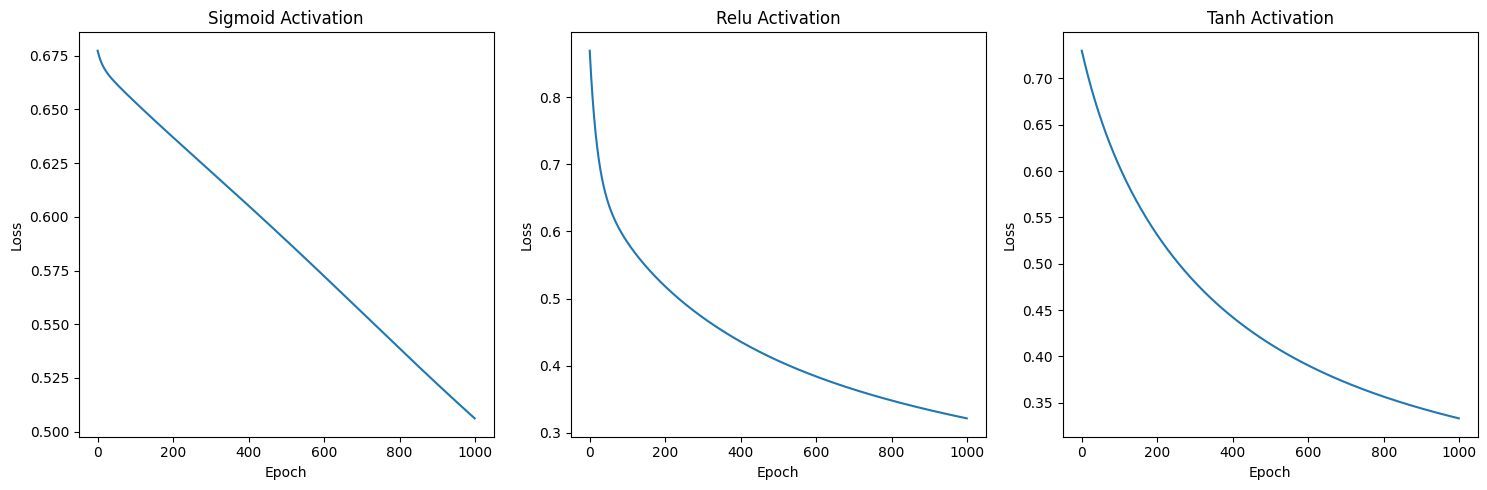


Sigmoid:
  Final Train Accuracy: 0.7905
  Final Test Accuracy: 0.7947

Relu:
  Final Train Accuracy: 0.8695
  Final Test Accuracy: 0.8193

Tanh:
  Final Train Accuracy: 0.8645
  Final Test Accuracy: 0.8241


In [27]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

class SentimentNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size=1, activation='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) / np.sqrt(self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -709, 709)))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.square(x)

    def activate(self, x):
        if self.activation == 'sigmoid':
            return self.sigmoid(x)
        elif self.activation == 'relu':
            return self.relu(x)
        elif self.activation == 'tanh':
            return self.tanh(x)

    def activate_derivative(self, x):
        if self.activation == 'sigmoid':
            return self.sigmoid_derivative(x)
        elif self.activation == 'relu':
            return self.relu_derivative(x)
        elif self.activation == 'tanh':
            return self.tanh_derivative(x)

    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activate(self.z1)

        # Output layer (always sigmoid for binary classification)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]

        # Output layer
        dz2 = output - y
        dW2 = (1 / m) * np.dot(self.a1.T, dz2)
        db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

        # Hidden layer
        dz1 = np.dot(dz2, self.W2.T) * self.activate_derivative(self.a1)
        dW1 = (1 / m) * np.dot(X.T, dz1)
        db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def train(self, X, y, learning_rate, epochs):
        losses = []
        for _ in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, y, output)

            # Update weights and biases
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

            # Compute loss
            loss = -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))
            losses.append(loss)

        return losses

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

def train_and_evaluate(X_train, y_train, X_test, y_test, activation):
    input_size = X_train.shape[1]
    hidden_size = 64
    model = SentimentNeuralNetwork(input_size=input_size, hidden_size=hidden_size, activation=activation)

    losses = model.train(X_train, y_train, learning_rate=0.01, epochs=1000)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    print(f"\nActivation Function: {activation}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, test_predictions, target_names=['Negative', 'Positive']))

    return losses, train_accuracy, test_accuracy

# Main execution
if __name__ == "__main__":

    X_train = X_train
    y_train = y_train
    X_test = X_test
    y_test = y_test

    activations = ['sigmoid', 'relu', 'tanh']
    results = {}

    plt.figure(figsize=(15, 5))

    for i, activation in enumerate(activations):
        losses, train_acc, test_acc = train_and_evaluate(X_train, y_train, X_test, y_test, activation)
        results[activation] = {'losses': losses, 'train_acc': train_acc, 'test_acc': test_acc}

        plt.subplot(1, 3, i+1)
        plt.plot(losses)
        plt.title(f'{activation.capitalize()} Activation')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

    # Compare final accuracies
    for activation in activations:
        print(f"\n{activation.capitalize()}:")
        print(f"  Final Train Accuracy: {results[activation]['train_acc']:.4f}")
        print(f"  Final Test Accuracy: {results[activation]['test_acc']:.4f}")

Evaluate the model on a test set using accuracy and plot the loss over epochs.

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('Tweets.csv')


X = df['text']
y = (df['airline_sentiment'] == 'positive').astype(int)  # Binary sentiment

# Convert text to numerical features
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(X).toarray()

# First, split into train+val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split train+val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert to numpy arrays
y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (9369, 1000)
Validation set shape: (2343, 1000)
Test set shape: (2928, 1000)


Epoch 0, Train Loss: 0.6689, Val Loss: 0.6552, Train Acc: 0.6871, Val Acc: 0.6620
Epoch 100, Train Loss: 0.4400, Val Loss: 0.4403, Train Acc: 0.8373, Val Acc: 0.8378
Epoch 200, Train Loss: 0.4325, Val Loss: 0.4333, Train Acc: 0.8373, Val Acc: 0.8378
Epoch 300, Train Loss: 0.4257, Val Loss: 0.4271, Train Acc: 0.8373, Val Acc: 0.8378
Epoch 400, Train Loss: 0.4188, Val Loss: 0.4210, Train Acc: 0.8373, Val Acc: 0.8378
Epoch 500, Train Loss: 0.4119, Val Loss: 0.4147, Train Acc: 0.8373, Val Acc: 0.8378
Epoch 600, Train Loss: 0.4047, Val Loss: 0.4083, Train Acc: 0.8373, Val Acc: 0.8378
Epoch 700, Train Loss: 0.3974, Val Loss: 0.4018, Train Acc: 0.8373, Val Acc: 0.8378
Epoch 800, Train Loss: 0.3898, Val Loss: 0.3950, Train Acc: 0.8373, Val Acc: 0.8378
Epoch 900, Train Loss: 0.3820, Val Loss: 0.3881, Train Acc: 0.8373, Val Acc: 0.8382


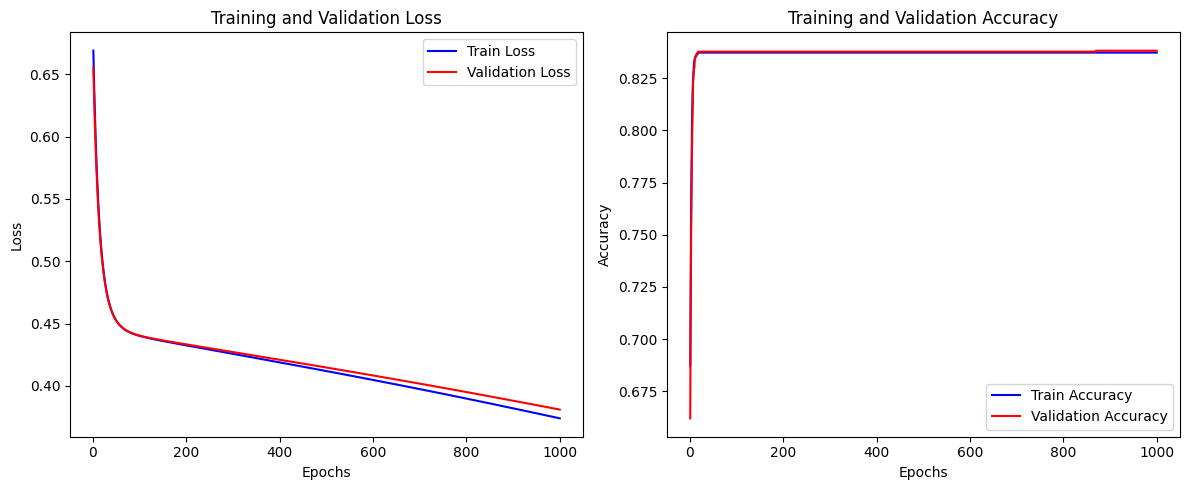


Test Accuracy: 0.8436

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      1.00      0.92      2469
    Positive       1.00      0.00      0.00       459

    accuracy                           0.84      2928
   macro avg       0.92      0.50      0.46      2928
weighted avg       0.87      0.84      0.77      2928



In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

class SentimentNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size=1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) / np.sqrt(self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -709, 709)))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]

        # Output layer
        dz2 = output - y
        dW2 = (1 / m) * np.dot(self.a1.T, dz2)
        db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

        # Hidden layer
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = (1 / m) * np.dot(X.T, dz1)
        db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def train(self, X_train, y_train, X_val, y_val, learning_rate, epochs):
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(epochs):
            # Forward pass
            train_output = self.forward(X_train)

            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X_train, y_train, train_output)

            # Update weights and biases
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

            # Compute and store train loss and accuracy
            train_loss = self.compute_loss(y_train, train_output)
            train_losses.append(train_loss)
            train_accuracy = self.compute_accuracy(X_train, y_train)
            train_accuracies.append(train_accuracy)

            # Compute and store validation loss and accuracy
            val_output = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_output)
            val_losses.append(val_loss)
            val_accuracy = self.compute_accuracy(X_val, y_val)
            val_accuracies.append(val_accuracy)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                      f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        return train_losses, val_losses, train_accuracies, val_accuracies

    def compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))

    def compute_accuracy(self, X, y_true):
        y_pred = self.predict(X)
        return accuracy_score(y_true, y_pred)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

def plot_training_progress(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Train Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":


    # Create and train the model
    input_size = X_train.shape[1]
    hidden_size = 64  # You can adjust this
    model = SentimentNeuralNetwork(input_size=input_size, hidden_size=hidden_size)

    train_losses, val_losses, train_accuracies, val_accuracies = model.train(
        X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=1000
    )

    # Plot training progress
    plot_training_progress(train_losses, val_losses, train_accuracies, val_accuracies)

    # Evaluate on test set
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"\nTest Accuracy: {test_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, test_predictions, target_names=['Negative', 'Positive']))